<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

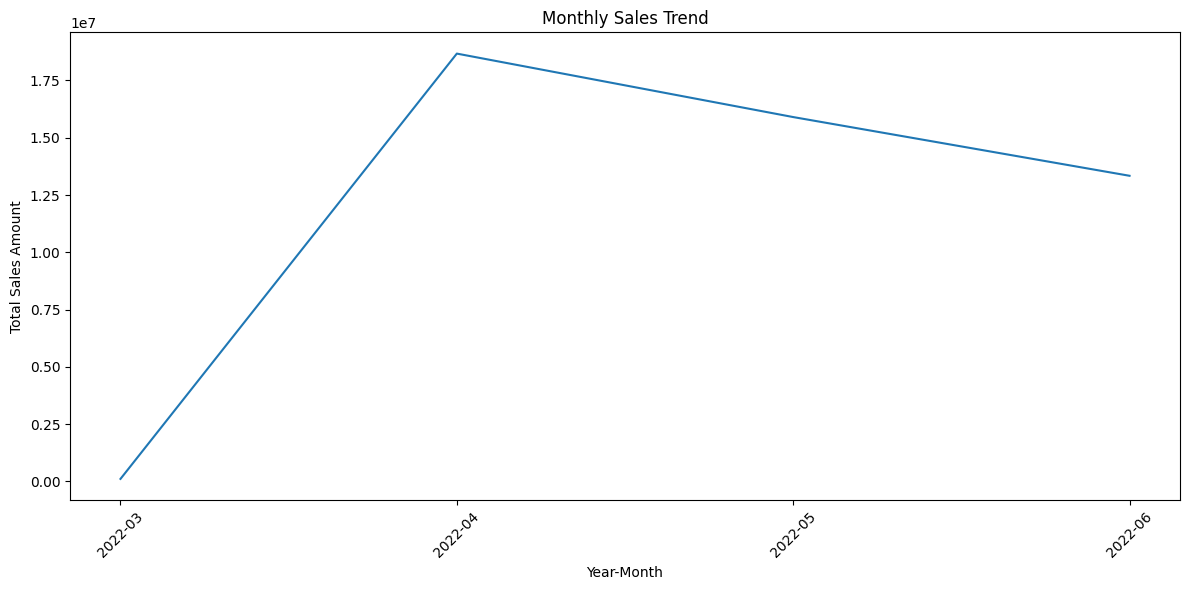

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://drive.google.com/uc?id=1YrjYKtS1WHmINL6eafRsrDzrZaw2_WvX'
df = pd.read_csv(url)

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
# Forward fill (ffill) is used for demonstration, but it should be based on data context
df = df.fillna(method='ffill')

# Convert Date column to datetime
# Handle cases where parsing might fail by setting errors='coerce'
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

# Check if there are still any issues with the Date column after parsing
print(df['Date'].isnull().sum())  # Count of NaT (Not a Time) entries

# Extract year and month for easier analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['YearMonth'] = df['Date'].dt.to_period('M')

# Convert Amount to numeric, removing currency symbols if present
df['Amount'] = pd.to_numeric(df['Amount'].replace('[\$,]', '', regex=True), errors='coerce')

# Monthly sales trend
monthly_sales = df.groupby('YearMonth')['Amount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Amount'])
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


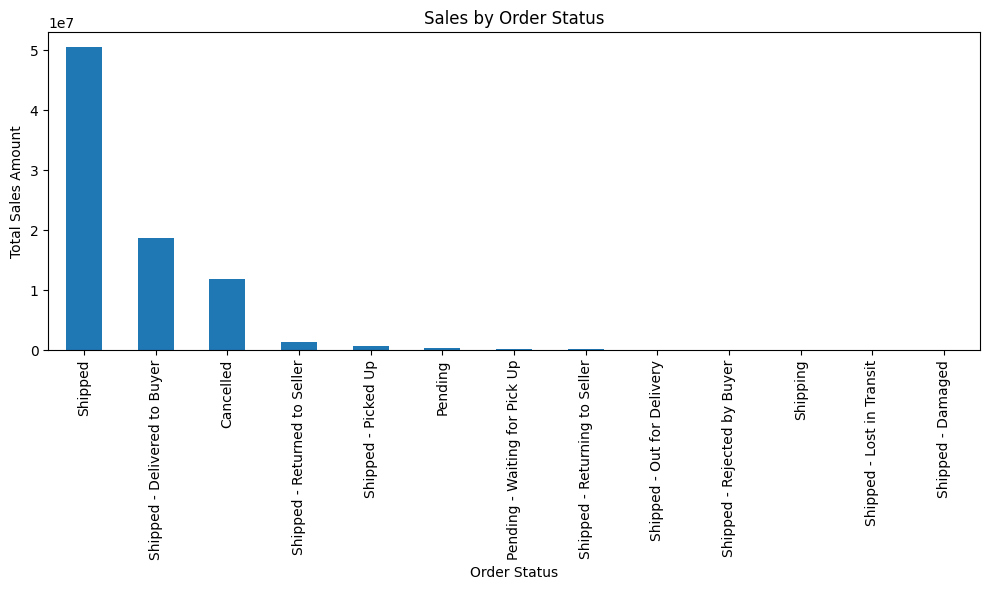

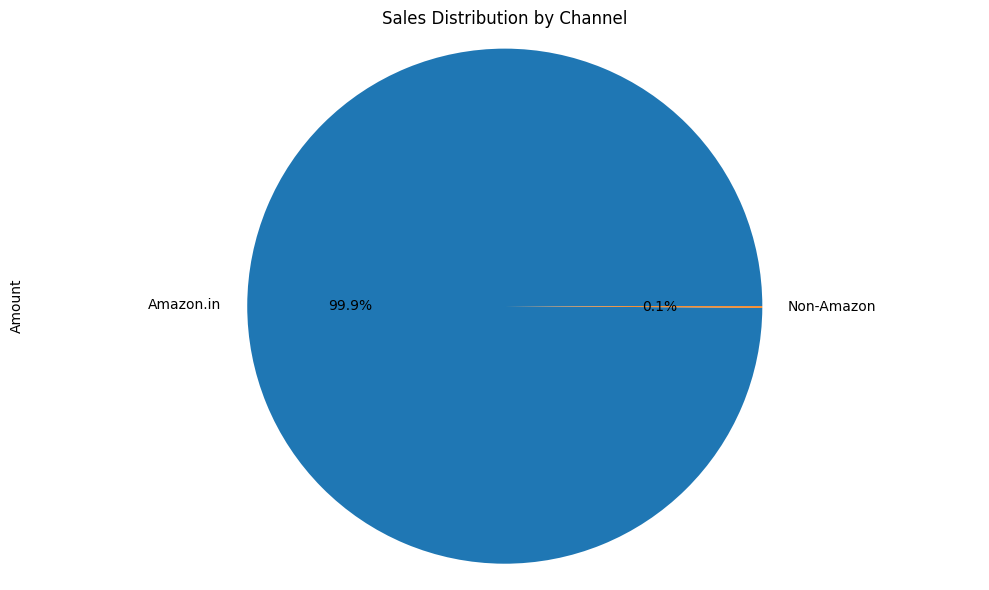

In [8]:
# Sales by status
status_sales = df.groupby('Status')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
status_sales.plot(kind='bar')
plt.title('Sales by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

# Sales channel analysis
channel_sales = df.groupby('Sales Channel')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
channel_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Channel')
plt.axis('equal')
plt.tight_layout()
plt.show()

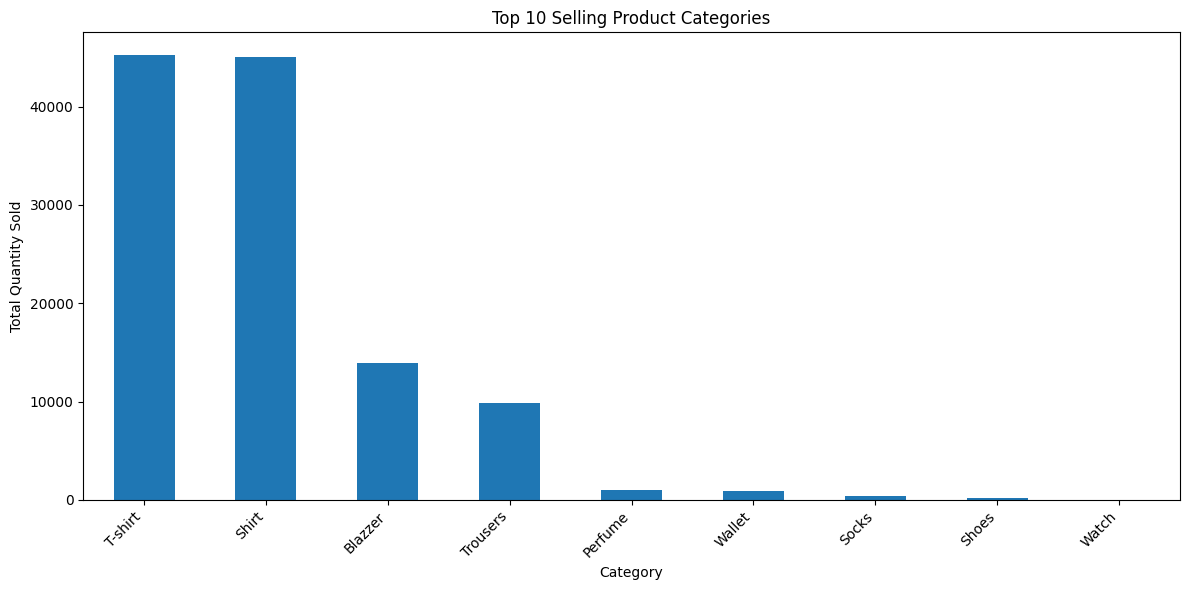

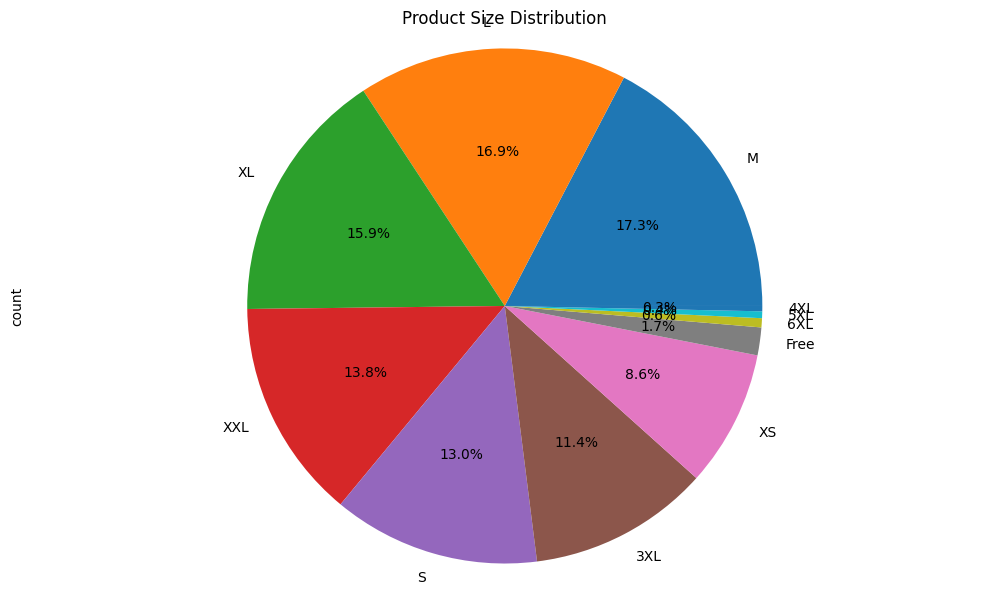

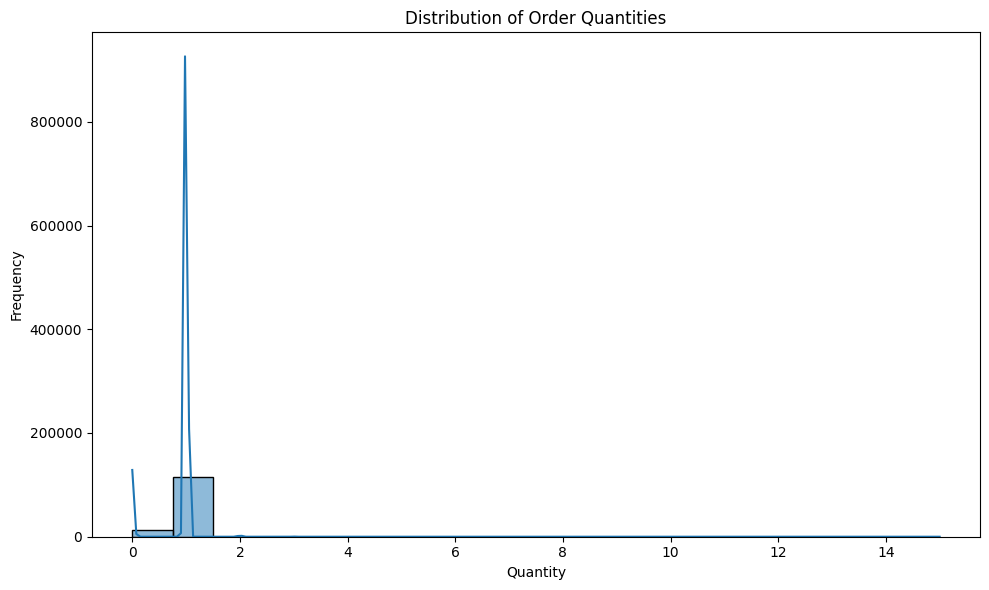

In [9]:
# Top selling categories
top_categories = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Selling Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Size distribution
size_distribution = df['Size'].value_counts()

plt.figure(figsize=(10, 6))
size_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Size Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Quantity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], bins=20, kde=True)
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

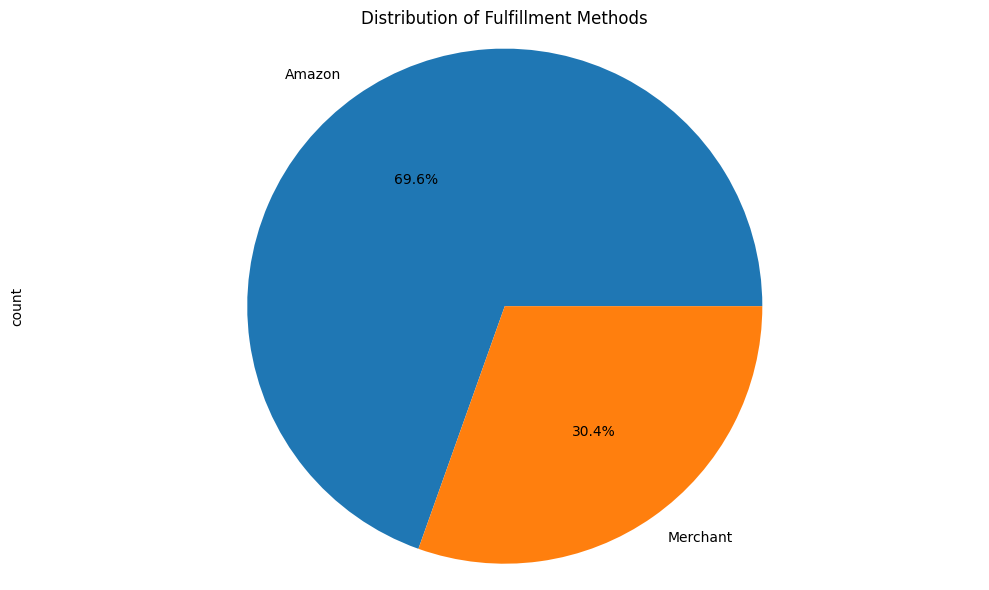

<Figure size 1200x600 with 0 Axes>

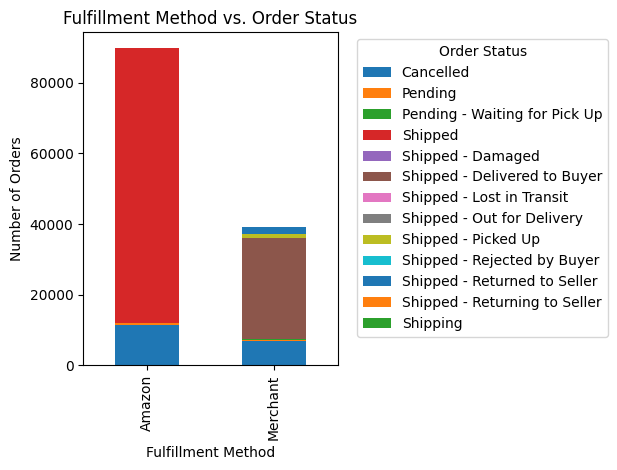

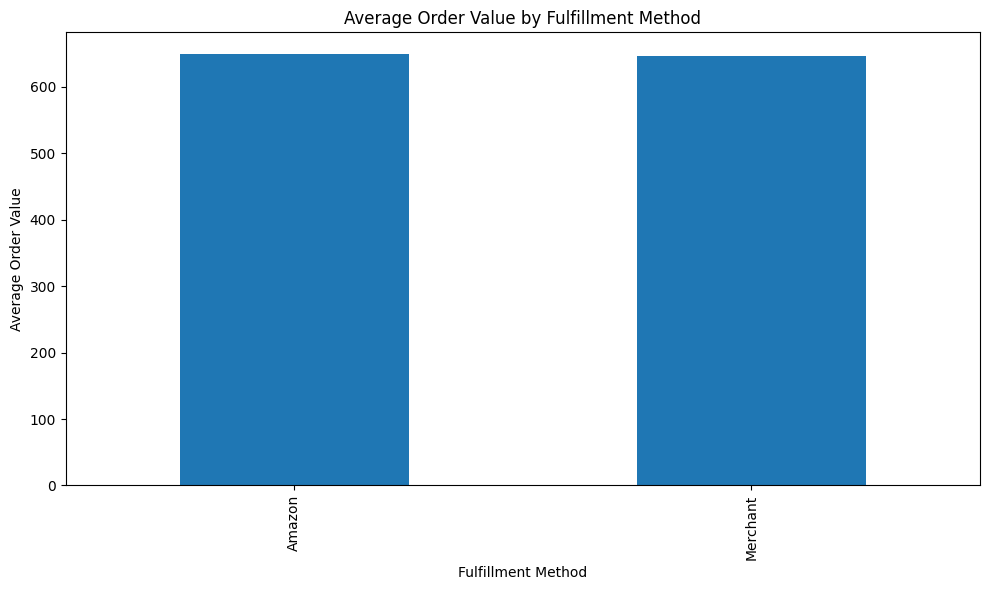

                 Amount    Qty  Order_Count  Avg_Order_Value  \
Fulfilment                                                     
Amazon      58268399.47  84097        89713       649.497837   
Merchant    25386364.32  32549        39263       646.572201   

            Avg_Qty_per_Order  
Fulfilment                     
Amazon               0.937400  
Merchant             0.828999  


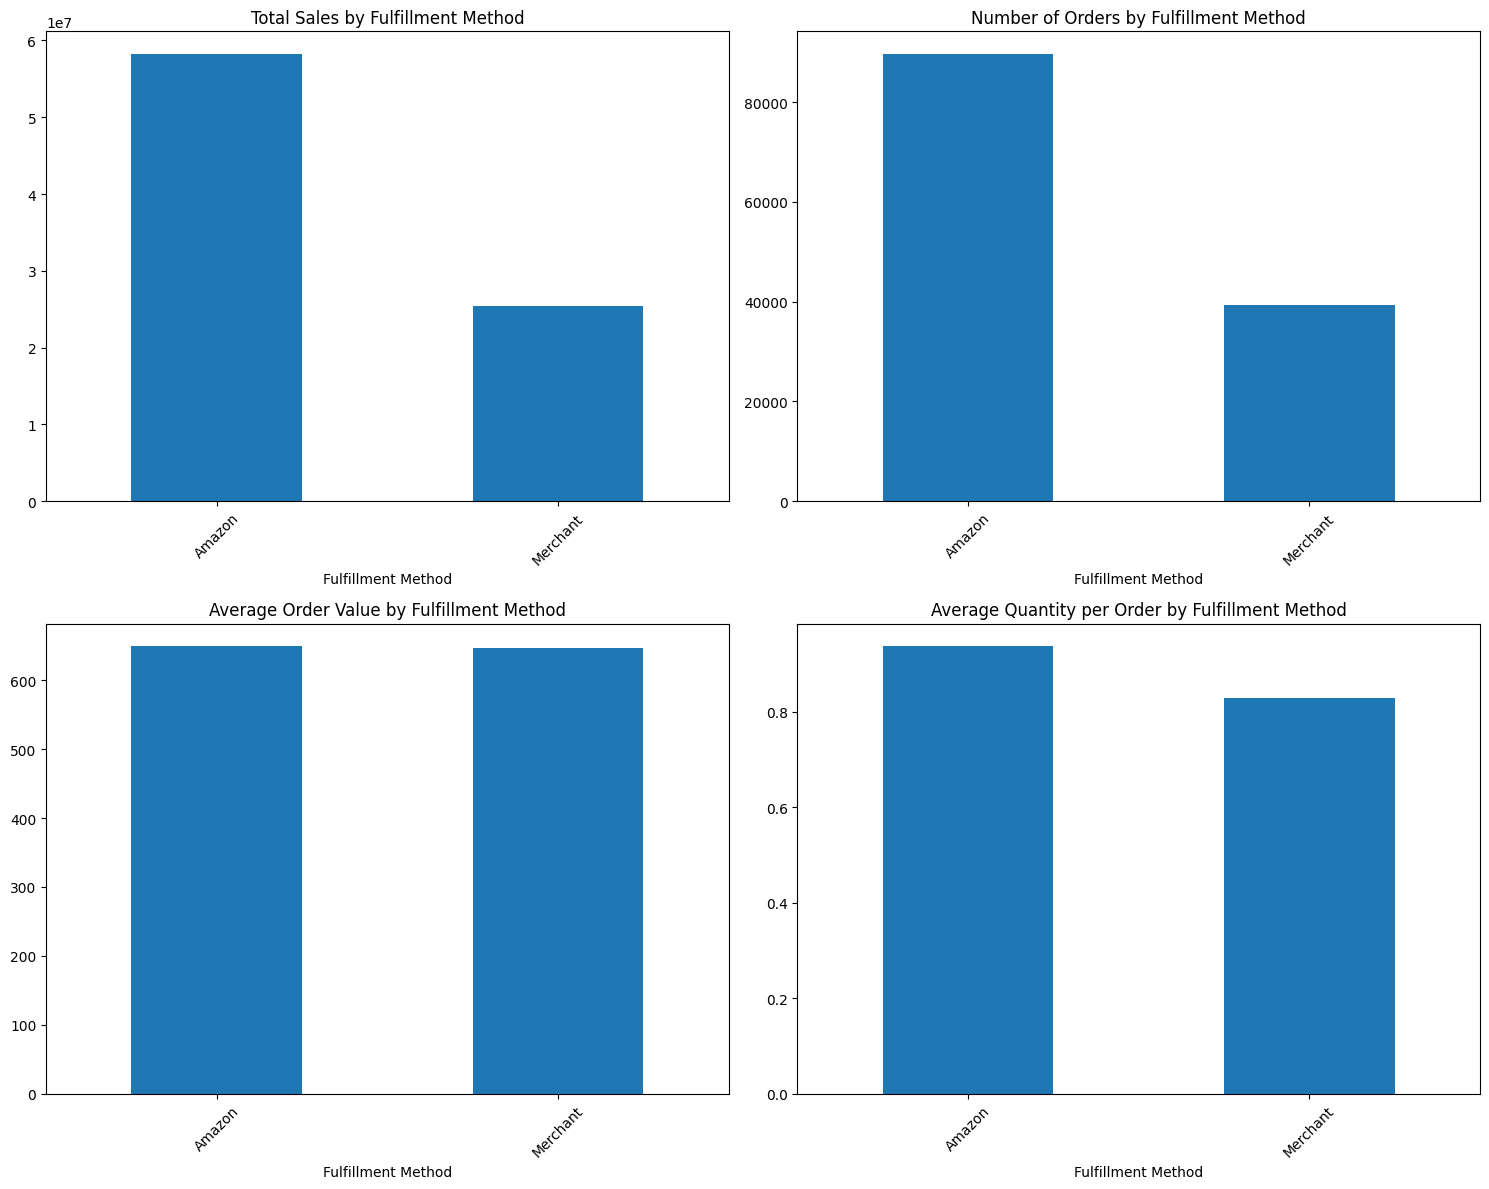

In [10]:
# Fulfillment Analysis

# Fulfillment method distribution
fulfillment_dist = df['Fulfilment'].value_counts()

plt.figure(figsize=(10, 6))
fulfillment_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Fulfillment Methods')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Fulfillment method vs. Order Status
fulfillment_status = pd.crosstab(df['Fulfilment'], df['Status'])

plt.figure(figsize=(12, 6))
fulfillment_status.plot(kind='bar', stacked=True)
plt.title('Fulfillment Method vs. Order Status')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Average order value by fulfillment method
avg_order_value = df.groupby('Fulfilment')['Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_order_value.plot(kind='bar')
plt.title('Average Order Value by Fulfillment Method')
plt.xlabel('Fulfillment Method')
plt.ylabel('Average Order Value')
plt.tight_layout()
plt.show()

# Fulfillment method performance
fulfillment_performance = df.groupby('Fulfilment').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Order_Count'})

fulfillment_performance['Avg_Order_Value'] = fulfillment_performance['Amount'] / fulfillment_performance['Order_Count']
fulfillment_performance['Avg_Qty_per_Order'] = fulfillment_performance['Qty'] / fulfillment_performance['Order_Count']

print(fulfillment_performance)

# Visualize fulfillment method performance
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

fulfillment_performance['Amount'].plot(kind='bar', ax=ax[0, 0], title='Total Sales by Fulfillment Method')
fulfillment_performance['Order_Count'].plot(kind='bar', ax=ax[0, 1], title='Number of Orders by Fulfillment Method')
fulfillment_performance['Avg_Order_Value'].plot(kind='bar', ax=ax[1, 0], title='Average Order Value by Fulfillment Method')
fulfillment_performance['Avg_Qty_per_Order'].plot(kind='bar', ax=ax[1, 1], title='Average Quantity per Order by Fulfillment Method')

for a in ax.flat:
    a.set_xlabel('Fulfillment Method')
    a.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

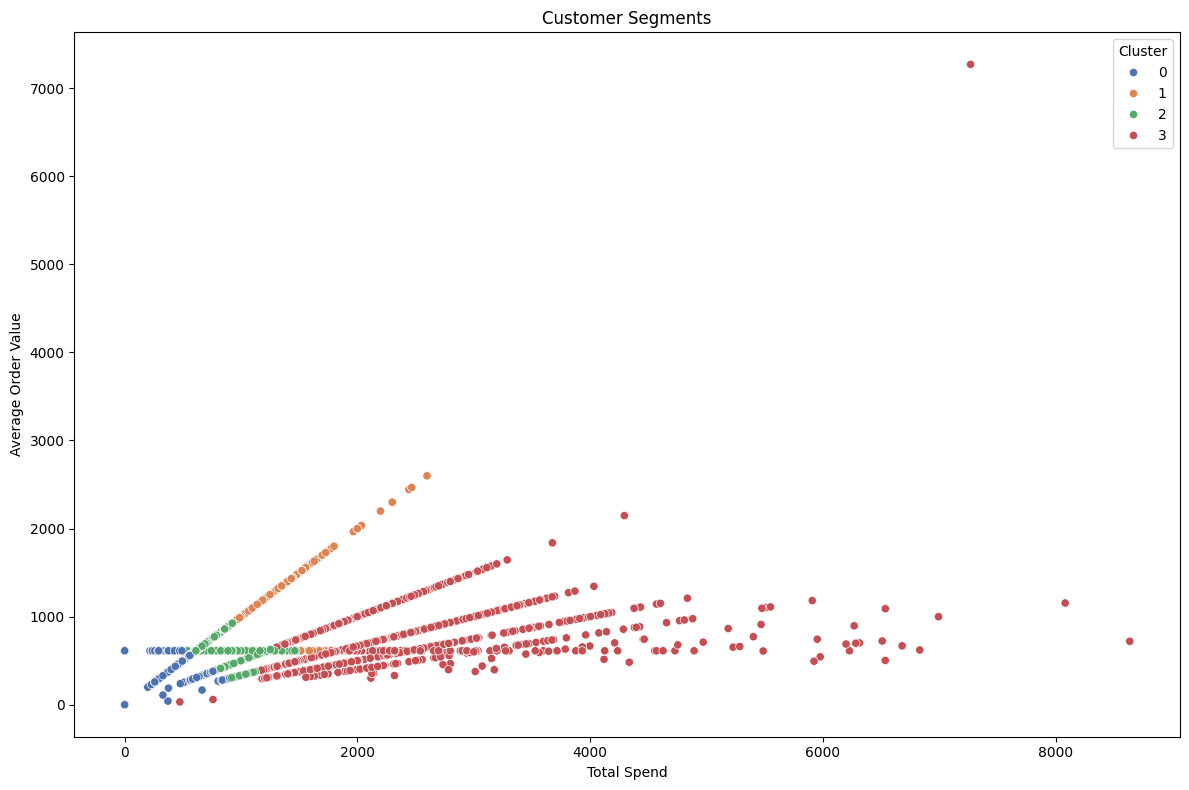

Cluster Summary:
          TotalSpend  TotalQuantity  CustomerLifetime  AvgOrderValue
Cluster                                                             
0         420.759202       0.929090               0.0     433.954695
1        1164.299846       0.993642               0.0    1158.083474
2         757.199299       0.908519               0.0     703.087339
3        1924.281449       2.390166               0.0     791.746620


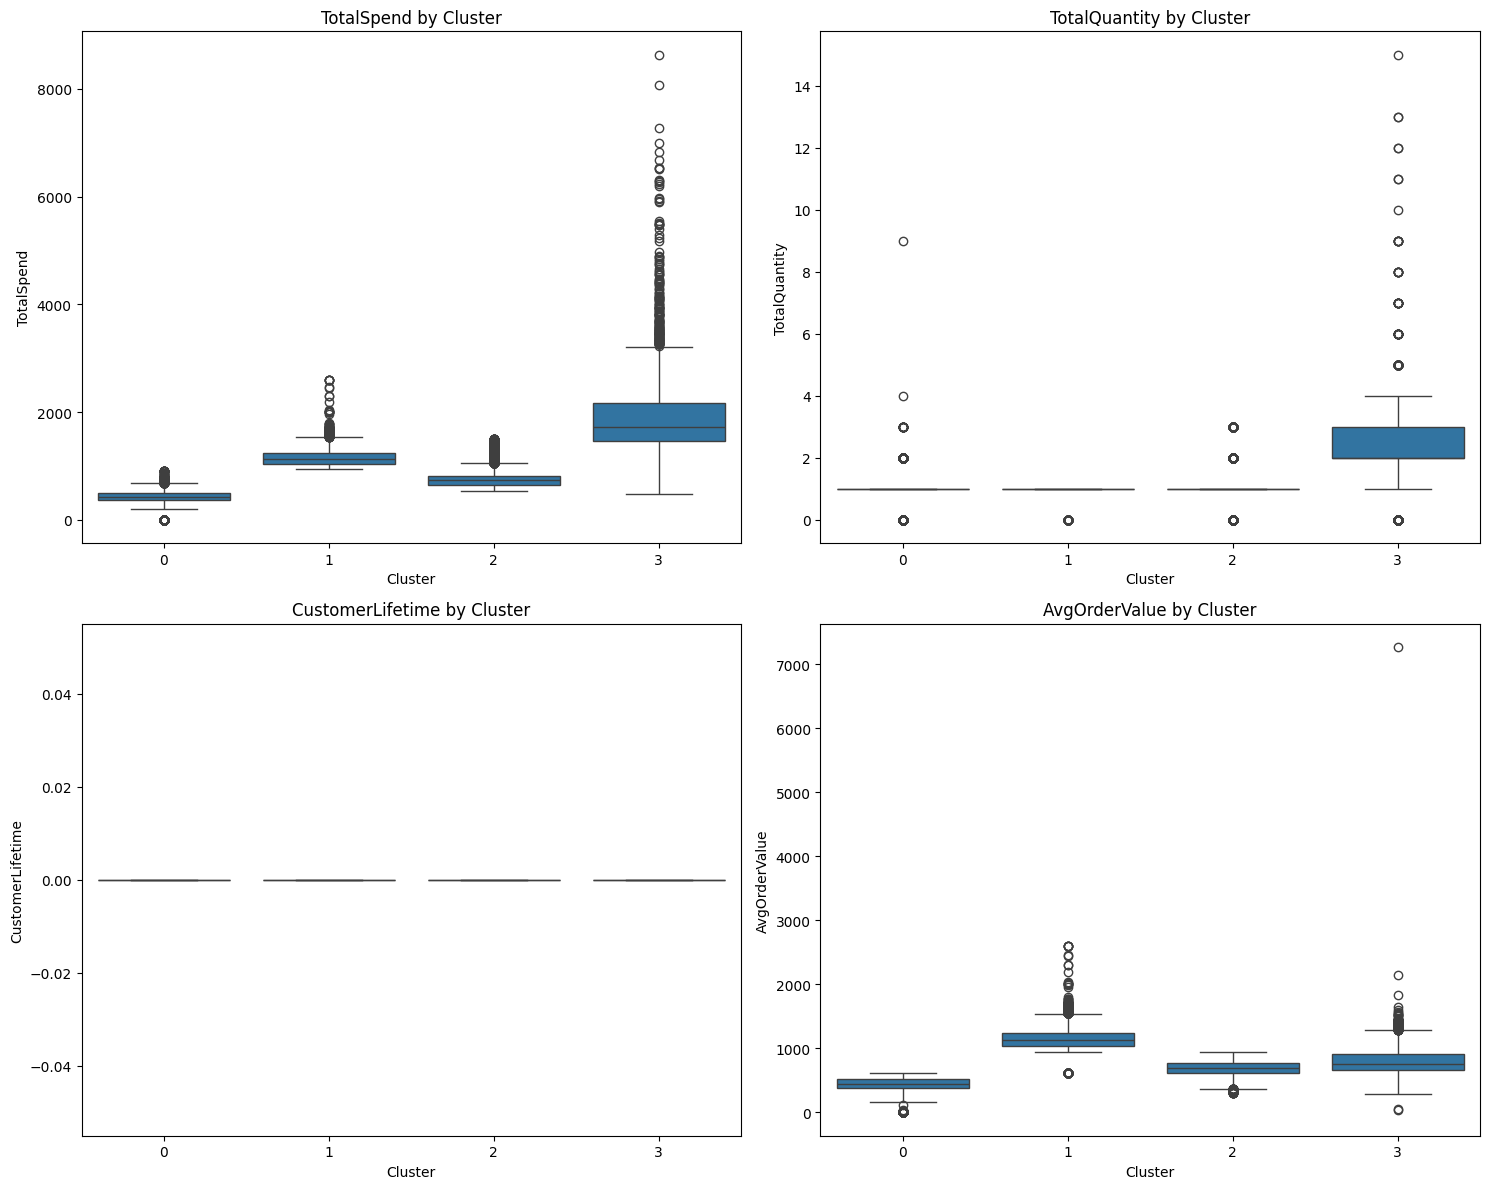


Cluster Sizes:
Cluster
0    51756
1    14785
2    50251
3     3437
Name: count, dtype: int64

Cluster 0 Interpretation:
TotalSpend          420.759202
TotalQuantity         0.929090
CustomerLifetime      0.000000
AvgOrderValue       433.954695
Name: 0, dtype: float64
Number of customers: 51756
Low total spend
Low average order value
Short customer lifetime

Cluster 1 Interpretation:
TotalSpend          1164.299846
TotalQuantity          0.993642
CustomerLifetime       0.000000
AvgOrderValue       1158.083474
Name: 1, dtype: float64
Number of customers: 14785
High total spend
High average order value
Short customer lifetime

Cluster 2 Interpretation:
TotalSpend          757.199299
TotalQuantity         0.908519
CustomerLifetime      0.000000
AvgOrderValue       703.087339
Name: 2, dtype: float64
Number of customers: 50251
Low total spend
Low average order value
Short customer lifetime

Cluster 3 Interpretation:
TotalSpend          1924.281449
TotalQuantity          2.390166
CustomerLif

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Create customer-level features
customer_features = df.groupby('Order ID').agg({
    'Amount': 'sum',
    'Qty': 'sum',
    'Date': lambda x: (x.max() - x.min()).days
})

customer_features.columns = ['TotalSpend', 'TotalQuantity', 'CustomerLifetime']
customer_features['AvgOrderValue'] = customer_features['TotalSpend'] / customer_features['TotalQuantity']

# Remove infinite values and replace with NaN
customer_features = customer_features.replace([np.inf, -np.inf], np.nan)

# Impute NaN values with median
imputer = SimpleImputer(strategy='median')
customer_features_imputed = pd.DataFrame(imputer.fit_transform(customer_features),
                                         columns=customer_features.columns,
                                         index=customer_features.index)

# Normalize features using RobustScaler
scaler = RobustScaler()
normalized_features = scaler.fit_transform(customer_features_imputed)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
customer_features_imputed['Cluster'] = kmeans.fit_predict(normalized_features)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_features_imputed, x='TotalSpend', y='AvgOrderValue', hue='Cluster', palette='deep')
plt.title('Customer Segments')
plt.xlabel('Total Spend')
plt.ylabel('Average Order Value')
plt.tight_layout()
plt.show()

# Analyze cluster characteristics
cluster_summary = customer_features_imputed.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, column in enumerate(['TotalSpend', 'TotalQuantity', 'CustomerLifetime', 'AvgOrderValue']):
    sns.boxplot(x='Cluster', y=column, data=customer_features_imputed, ax=axes[i])
    axes[i].set_title(f'{column} by Cluster')

plt.tight_layout()
plt.show()

# Calculate and print the size of each cluster
cluster_sizes = customer_features_imputed['Cluster'].value_counts().sort_index()
print("\nCluster Sizes:")
print(cluster_sizes)

# Provide interpretations for each cluster
for cluster in range(4):
    print(f"\nCluster {cluster} Interpretation:")
    print(cluster_summary.loc[cluster])
    print(f"Number of customers: {cluster_sizes[cluster]}")
    if cluster_summary.loc[cluster, 'TotalSpend'] > cluster_summary['TotalSpend'].mean():
        print("High total spend")
    else:
        print("Low total spend")
    if cluster_summary.loc[cluster, 'AvgOrderValue'] > cluster_summary['AvgOrderValue'].mean():
        print("High average order value")
    else:
        print("Low average order value")
    if cluster_summary.loc[cluster, 'CustomerLifetime'] > cluster_summary['CustomerLifetime'].mean():
        print("Long customer lifetime")
    else:
        print("Short customer lifetime")

In [12]:
import plotly.express as px

# Interactive monthly sales trend
fig = px.line(monthly_sales, x='YearMonth', y='Amount', title='Interactive Monthly Sales Trend')
fig.update_xaxes(title='Year-Month')
fig.update_yaxes(title='Total Sales Amount')
fig.show()

In [13]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/Untitled3.ipynb

[NbConvertApp] Converting notebook /content/Untitled3.ipynb to html
[NbConvertApp] Writing 1364106 bytes to /content/Untitled3.html
